In [6]:
# tmatrixhy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from piazza
D = [[0,206,429,1504,963,2976,3095,2979,1949],
      [206,0,233,1308,802,2815,2934,2786,1771],
      [429,233,0,1075,671,2684,2799,2631,1616],
      [1504,1308,1075,0,1329,3273,3053,2687,2037],
      [963,802,671,1329,0,2013,2142,2054,996],
      [2976,2815,2684,3273,2013,0,808,1131,1307],
      [3095,2934,2799,3053,2142,808,0,379,1235],
      [2979,2786,2631,2687,2054,1131,379,0,1059],
      [1949,1771,1616,2037,996,1307,1235,1059,0]]

D = pd.DataFrame(D)

In [9]:
cities=['BOS','NYC','DC','MIA','CHI','SEA','SF','LA','DEN']
X = []

#initialize all lat / long with random number
#change random number higher or lower for different results
for z in cities:
    X.append([np.random.randint(3500),np.random.randint(3500)])

X = np.asarray(X).astype(float)


#the functions below were derived from examples in the lecture slides below:
#http://www.ds100.org/fa18/assets/lectures/lec09/09-modeling-and-estimation-II.pptx

def objective_derivative(X,i,D):
    #coded version of #1 
    summation = np.zeros([1, 2])
    for j in range(len(cities)):
        if i!=j:
            distance = np.linalg.norm(X[i] - X[j])
            summation+= ((distance - D[i][j]) / distance) * (X[i] - X[j])
    return summation

def gradient(X, D, alpha):
    grad = np.zeros((len(cities),2))
    grad.astype(float)
    for i in range(len(cities)):
        #for each city calculate the gradient and take a step in that direction
        grad[i] = (alpha * objective_derivative(X,i,D))
    X -= grad

#specify alpha for gradient descent here
alpha = 0.2

for i in range(2000):    
    gradient(X,D, alpha)

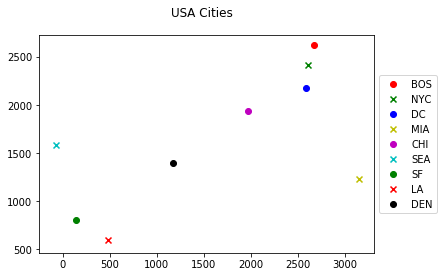

In [10]:
#Plot Map.
x,y = X.T #splits x,y (lat/long) component for plot
colors = "rgbymcgrk"
col_idx = 0

fig, ax = plt.subplots()

for x_i, y_i, city in zip(x,y,cities):
    if col_idx % 2 == 0:
        ax.scatter(x_i,y_i,c=colors[col_idx],marker='o',label=city)
    else:
        ax.scatter(x_i,y_i,c=colors[col_idx],marker='x',label=city)
    col_idx+=1

fig.suptitle('USA Cities')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()